# 로지스틱 회귀
## #01. 작업준비
### 패키지 가져오기



In [1]:
import pandas as pd
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, f1_score,recall_score
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import sys

### 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 가져오기
방사선학 석사과정 대학원생 모집을 하였다. 이 때 지원한 방사선사의 대학원 합격 여부에 따른 주요 요인이 무엇인지 분석하라.

단, 독립변수는 정규분포를 따른다고 가정한다


|변수|	구분	|설명|
|--|--|--|
|합격여부|	범주형|	1=합격, 0=불합격|
|필기점수|	연속형|	800점 만점|
|학부성적|	연속형|	4.0 만점|
|병원경력|	범주형|	1: 10년이상, 2: 2~5년, 3: 1~5년, 4: 1년 미만|


In [3]:
df = pd.read_excel("https://data.hossam.kr/E05/gradeuate.xlsx")
df

,합격여부,필기점수,학부성적,병원경력
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


## #02. 기본 분석
### 로지스틱 회귀 수행



In [4]:
df1 = df.copy()
df1.head()

,합격여부,필기점수,학부성적,병원경력
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
model = logit('합격여부 ~ 필기점수 + 학부성적 + 병원경력',data = df1)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   합격여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                 0.08107
Time:                        14:18:07   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4495      1.133     -3.045      0.002      -5.670      -1.229
필기점수           0.0023      0.

### 로지스틱 회귀의 설명력 - 의사결정계수 (Pseudo - R^2)
종속변수의 분산 중 어느 정도 비율(%)이 독립변수에 의해 설명되는가를 나타내는 값

In [6]:
fit.prsquared

0.08107331586891464

### 예측결과를 데이터 프레임에 추가 

In [7]:
df1['예측값'] = fit.predict(df.drop('합격여부',axis=1))
df1['예측결과'] = df1['예측값'] > 0.5
df1

,합격여부,필기점수,학부성적,병원경력,예측값,예측결과
0,0,380,3.61,3,0.189553,False
1,1,660,3.67,3,0.317781,False
2,1,800,4.00,1,0.717814,True
3,1,640,3.19,4,0.148949,False
4,0,520,2.93,4,0.097954,False
...,...,...,...,...,...,...
395,0,620,4.00,2,0.490176,False
396,0,560,3.04,3,0.184989,False
397,0,460,2.63,2,0.186814,False
398,0,700,3.65,2,0.468108,False


### 혼동행렬 구하기

In [17]:
cm = confusion_matrix(df1['합격여부'],df1['예측결과'])

tn,tp,   fn,fp = cm.ravel()

print(tp, tn, fp, fn)
cmdf = pd.DataFrame(cm,index = ['True','False'],columns=['Negative','Positive'])
cmdf

20 253 29 98


,Negative,Positive
True,253,20
False,98,29


In [9]:
fp

29

### ROC Curve 시각화

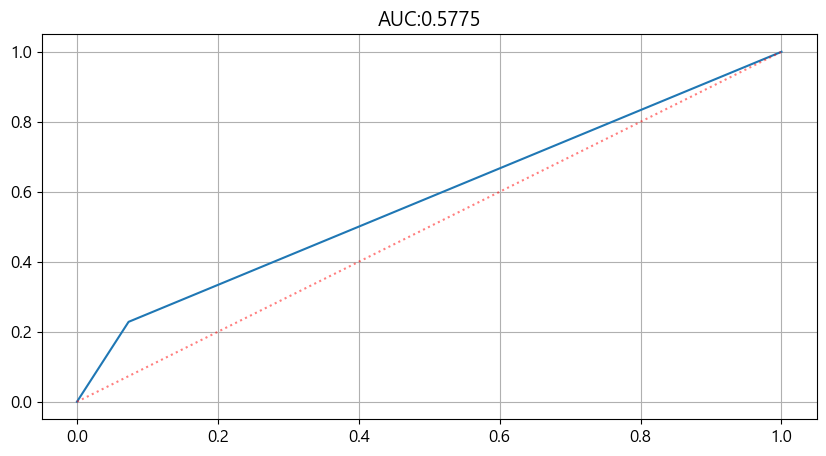

In [10]:
ras = roc_auc_score(df1['합격여부'],df1['예측결과'])
## 위양성률, 재현율, 임계값

fpr, tpr, threshold = roc_curve(df1['합격여부'],df1['예측결과'])

plt.figure()
sb.lineplot(x=fpr,y=tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title("AUC:{:.4f}".format(ras))
plt.grid()
plt.show()
plt.close()

In [11]:
# 정혹도
acc = accuracy_score(df1['합격여부'],df1['예측결과'])
# 정밀도
pre = precision_score(df1['합격여부'],df1['예측결과'])
## 재현율

recall = recall_score(df1['합격여부'],df1['예측결과'])

## F!-score
F1 = f1_score(df1['합격여부'],df1['예측결과'])

# 위양성률
fallout = spe = fp/(fp+tn)
# 특이성

spe = tnr = 1-fallout
result_df = pd.DataFrame({'설명력(Pseudo-Rsqe)': [fit.prsquared], '정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe],'RAS':[ras], 'f1_score':[F1]})

result_df

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.081073,0.705,0.591837,0.228346,0.102837,0.897163,0.577543,0.329545


### 오즈비 구하기

#### 계수값들만 추출
- 독립변수의 coef : logit함수 계수, 해당 독립변수의 odds에 log를 씌운값



In [12]:
coef = fit.params
coef

Intercept   -3.449549
필기점수         0.002294
학부성적         0.777014
병원경력        -0.560031
dtype: float64

### 오즈비 계산
오즈비는 성공할 확률을 실패할 확률로 나눈 값이고 이 분석에서는 합격여부가 종속변수이므로 합격할 확률을 불합격할 확률로 나눈 값이다.

계수값에 대해 np.exp() 함수를 적용하면 각각의 회귀계수들을 오즈값으로 변환할 수 있다.

해당 독립변수가 종속변수에 미치는 영향을 더 직관적으로 확인할 수 있다. 학부성적이 종속변수인 합격여부에 끼치는 영향이 가장 크다고 볼 수 있다.

In [13]:
odds_rate  =np.exp(coef)
odds_rate

Intercept    0.031760
필기점수         1.002297
학부성적         2.174967
병원경력         0.571191
dtype: float64

### 가상의 데이터를 통한 합격 여부 예측

In [14]:
myinput = input("필기점수, 학부성적, 병원경력을 콤마(,)로 구분하여 입력하세요.\n예: 480,4.3,2")

if not myinput:
    myinput= "480,4.3,2"
myinput = myinput.split(',')
# myinput
mydata = {"필기점수":int(myinput[0].strip()),'학부성적':float(myinput[1].strip()),"병원경력":int(myinput[2])}
myresult = fit.predict(mydata)
myresult

0    0.468205
dtype: float64

In [15]:
"당신의 합격 확률은 {0:0.2f}% 입니다.".format(myresult[0]*100)

'당신의 합격 확률은 46.82% 입니다.'